# Loading Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
#Reading data files

In [21]:
train = pd.read_csv('train.csv')

In [22]:
test=pd.read_csv('test.csv')

In [23]:
train_update=pd.read_csv('train_updates_20220929.csv')

In [24]:
train.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [25]:
total_data = pd.concat([train,test])

#concatenating trainng and testing data

In [26]:
total_data.describe()

,seq_id,pH,tm
count,33803.000000,33517.000000,31390.000000
mean,16901.000000,6.972083,49.147337
std,9758.229911,1.579274,14.010089
min,0.000000,1.990000,-1.000000
25%,8450.500000,7.000000,42.100000
50%,16901.000000,7.000000,48.000000
75%,25351.500000,7.000000,53.800000
max,33802.000000,64.900000,130.000000


In [27]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33803 entries, 0 to 2412
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            33803 non-null  int64  
 1   protein_sequence  33803 non-null  object 
 2   pH                33517 non-null  float64
 3   data_source       30456 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


In [28]:
#handling missing values

total_data.isnull().sum()


seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                  2413
dtype: int64

In [29]:
total_data['data_source'] = total_data['data_source'].fillna(total_data['data_source'].mode()[0])

In [30]:
total_data['tm'] = total_data['tm'].fillna(total_data['tm'].mean())

#filling isNull values with mean()

In [31]:
total_data['pH'] = total_data['pH'].fillna(total_data['pH'].mode())

#filling isNull values with mode()

In [32]:
total_data.isnull().sum()

seq_id              0
protein_sequence    0
pH                  0
data_source         0
tm                  0
dtype: int64

In [33]:
#data split features into org, suborg, org_code and suborg_code

total_data['split'] = total_data['data_source'].str.split('/')

total_data['org'] = total_data['split'].map(lambda x: x[0].strip())
total_data['org_code'] = LabelEncoder().fit_transform(total_data['org'])

total_data['suborg'] = total_data['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
total_data['suborg_code'] = LabelEncoder().fit_transform(total_data['suborg'])

In [34]:
total_data.head(5)

,seq_id,protein_sequence,pH,data_source,tm,split,org,org_code,suborg,suborg_code
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,"[doi.org, 10.1038, s41592-020-0801-4]",doi.org,20,10.1038,12
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,"[doi.org, 10.1038, s41592-020-0801-4]",doi.org,20,10.1038,12
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,"[doi.org, 10.1038, s41592-020-0801-4]",doi.org,20,10.1038,12
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,"[doi.org, 10.1038, s41592-020-0801-4]",doi.org,20,10.1038,12
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,"[doi.org, 10.1038, s41592-020-0801-4]",doi.org,20,10.1038,12


In [35]:
# dropping some columns that are unnecessary

total_data.drop(['data_source','split','seq_id'],axis=1,inplace=True)
total_data

,protein_sequence,pH,tm,org,org_code,suborg,suborg_code
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.700000,doi.org,20,10.1038,12
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.500000,doi.org,20,10.1038,12
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.500000,doi.org,20,10.1038,12
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.200000,doi.org,20,10.1038,12
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.500000,doi.org,20,10.1038,12
...,...,...,...,...,...,...,...
2408,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,49.147337,Novozymes,19,Novozymes,20
2409,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,49.147337,Novozymes,19,Novozymes,20
2410,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,49.147337,Novozymes,19,Novozymes,20
2411,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8.0,49.147337,Novozymes,19,Novozymes,20


<function matplotlib.pyplot.show(close=None, block=None)>

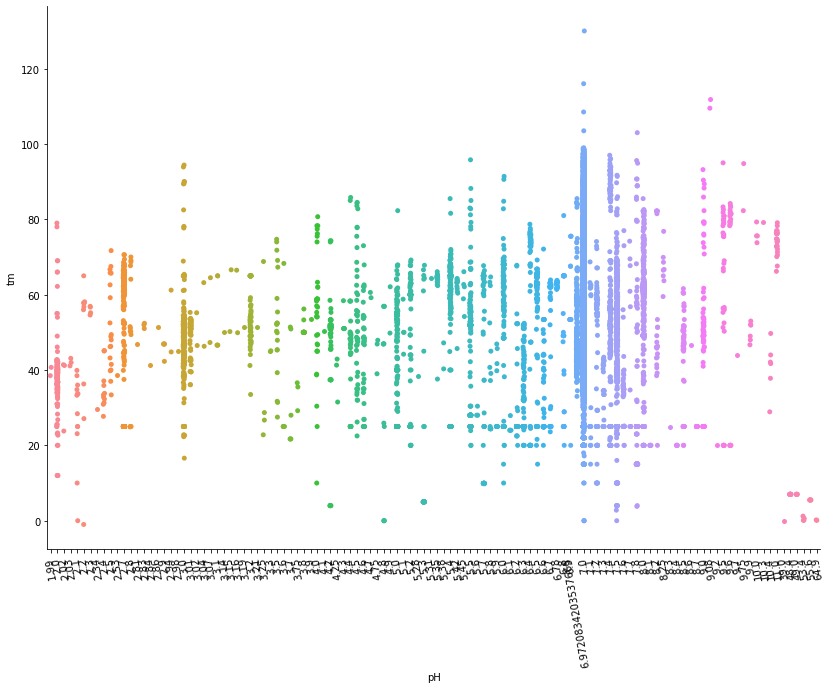

In [53]:
# data visualisation

#comparing pH values with target variable

sns.catplot(x='pH',y='tm',data=total_data,height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=100)
plt.show

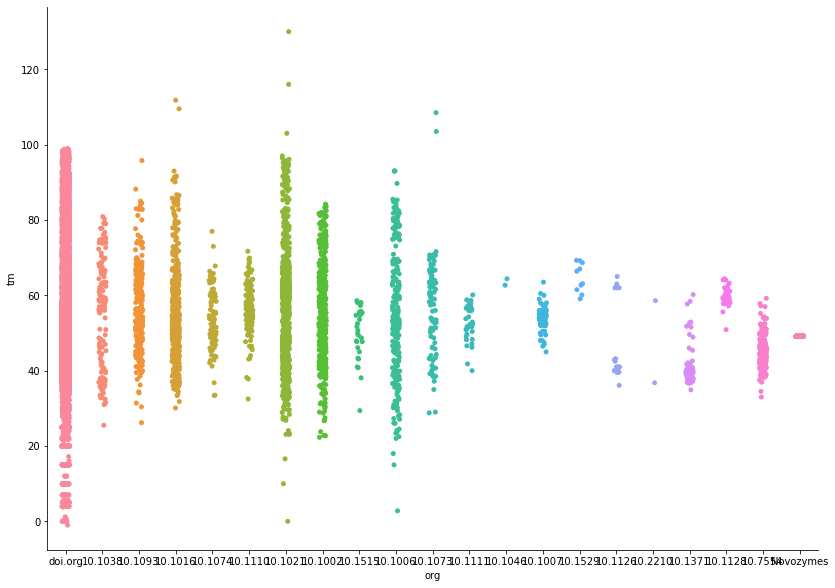

In [37]:
sns.catplot(x='org',y='tm',data=total_data, height=8.27, aspect=11.7/8.27)

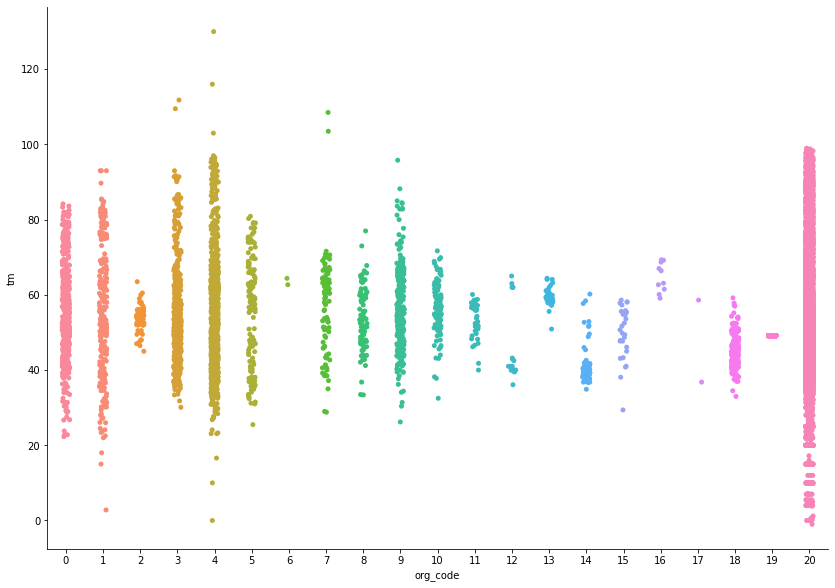

In [38]:
sns.catplot(x='org_code',y='tm',data=total_data, height=8.27, aspect=11.7/8.27)

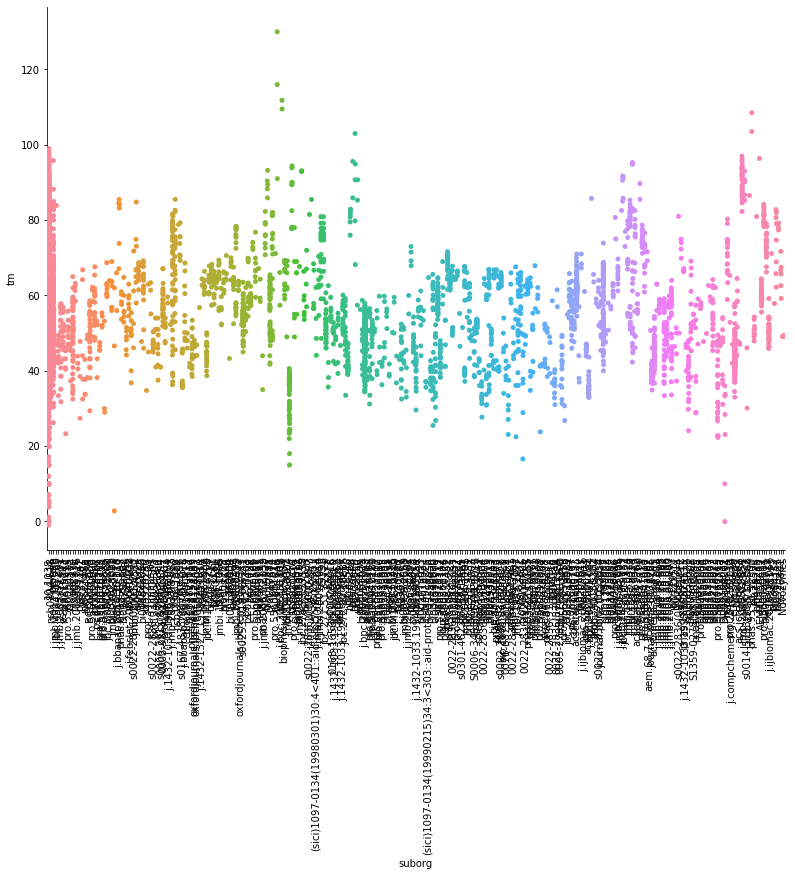

In [39]:
sns.catplot(x='suborg',y='tm',data=total_data, height=8.27, aspect=11.7/8.27,)
plt.xticks(rotation=90)
plt.show()

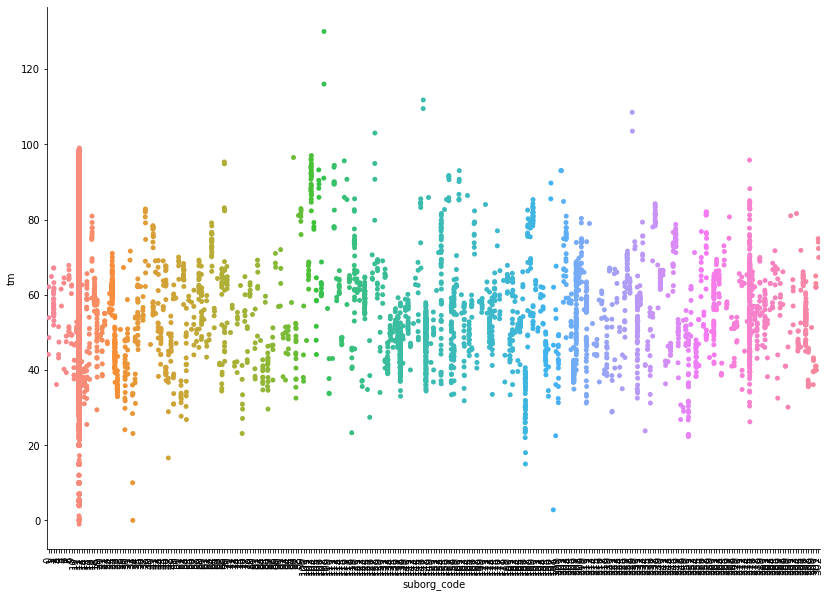

In [40]:
sns.catplot(x='suborg_code',y='tm',data=total_data, height=8.27, aspect=11.7/8.27,)
plt.xticks(rotation=90)
plt.show()

In [41]:
#DATA PREPROCESSING

#finding categorical data

#checking categorical variables
total_data.select_dtypes(include=['object'])

,protein_sequence,org,suborg
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,doi.org,10.1038
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,doi.org,10.1038
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,doi.org,10.1038
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,doi.org,10.1038
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,doi.org,10.1038
...,...,...,...
2408,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,Novozymes,Novozymes
2409,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,Novozymes,Novozymes
2410,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,Novozymes,Novozymes
2411,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,Novozymes,Novozymes


In [42]:
cols = ['protein_sequence','org','suborg']

In [43]:
#converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
for col in cols: 
    lbl = LabelEncoder() 
    lbl.fit(total_data[col]) 
    total_data[col] = lbl.transform(total_data[col])

In [44]:
total_data

,protein_sequence,pH,tm,org,org_code,suborg,suborg_code
0,0,7.0,75.700000,20,20,12,12
1,1,7.0,50.500000,20,20,12,12
2,2,7.0,40.500000,20,20,12,12
3,3,7.0,47.200000,20,20,12,12
4,4,7.0,49.500000,20,20,12,12
...,...,...,...,...,...,...,...
2408,31076,8.0,49.147337,19,19,20,20
2409,31077,8.0,49.147337,19,19,20,20
2410,31078,8.0,49.147337,19,19,20,20
2411,31079,8.0,49.147337,19,19,20,20


<AxesSubplot:>

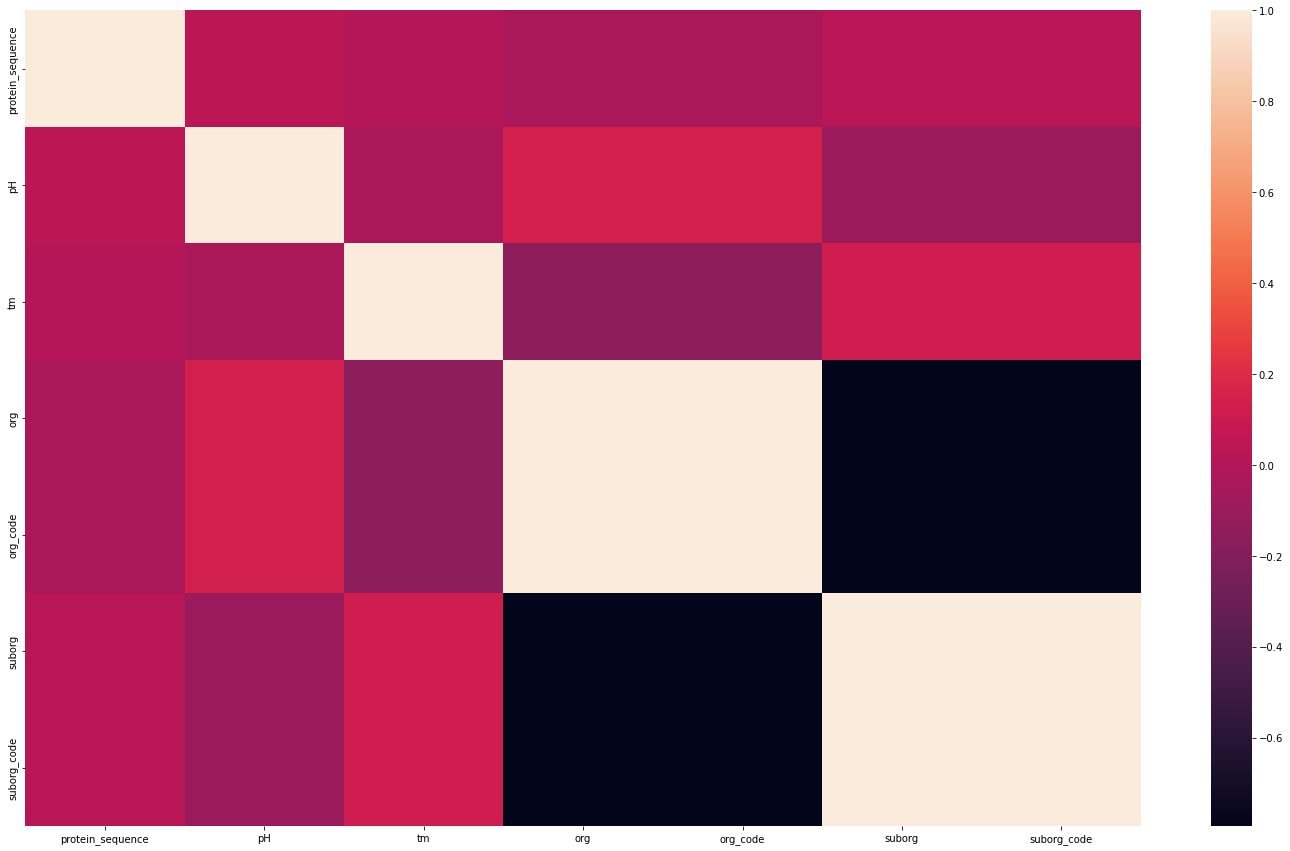

In [45]:
corr = total_data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr)

In [46]:
corr

,protein_sequence,pH,tm,org,org_code,suborg,suborg_code
protein_sequence,1.000000,0.045572,0.007323,-0.035517,-0.035517,0.022650,0.022650
pH,0.045572,1.000000,-0.043725,0.139371,0.139371,-0.105069,-0.105069
tm,0.007323,-0.043725,1.000000,-0.150543,-0.150543,0.119934,0.119934
org,-0.035517,0.139371,-0.150543,1.000000,1.000000,-0.794068,-0.794068
org_code,-0.035517,0.139371,-0.150543,1.000000,1.000000,-0.794068,-0.794068
suborg,0.022650,-0.105069,0.119934,-0.794068,-0.794068,1.000000,1.000000
suborg_code,0.022650,-0.105069,0.119934,-0.794068,-0.794068,1.000000,1.000000


In [47]:
#Data Modelling
#since its labelled dataset we are going to use supervised machine learning algorithm.
#As we can see the target variable 'tm' in pairplot values are not classified.
#It contains random values so considering this we are gonna use Regressor models.

y = total_data['tm']
X = total_data.drop(['tm'],axis=1)

In [48]:
#model creation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
#random forest regression

#Train the model
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=1000)

#Fit
RF.fit(X_train, y_train)

#Accuracy
print("Accuracy --> ", RF.score(X_train, y_train)*100)

Accuracy -->  88.5009561350865


In [50]:
#Fit
RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [52]:
#KNN Regressor

from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(X_train , y_train)

#Accuracy
print("Accuracy --> ", dtc.score(X_train, y_train)*100)

Accuracy -->  99.43064566255403
